## seaborn

In [12]:
# import numpy as np
# import umap
# import matplotlib.pyplot as plt
# import anndata as ad
# import seaborn as sns
# input_dir = "/Users/apple/Desktop/KB/data"
# num_top_lg_toplot = 5

# # Load dataset
# # data = np.load(input_dir+'/feat_submission/feat_1006_bs260_sf04_larry_full/scBaseEncoderFeat_Z_bs260_tau0.5.npy')
# data = np.load(input_dir+'/feat_RECOMB/full_data/larry_full/Larry_scvi_full_embeddings.npy')

# adata_subset = ad.read_h5ad(input_dir+'/LarryData/Larry_41093_2000_norm_log.h5ad')

# # Extract clone_id labels
# labels = adata_subset.obs["clone_id"].to_numpy()
# num_cells = labels.shape[0]

# print("data shape", data.shape)
# print("labels shape", num_cells)

# # Initialize UMAP and fit the data
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(data)

# # Determine the top lineages
# unique_labels, counts = np.unique(labels, return_counts=True)
# top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# # Create a custom color palette for the top 5 clone_ids
# custom_palette = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']
# default_color = 'gray'

# # Create a mapping from clone_id to color for the top 5
# lineage_to_color = {lineage: custom_palette[i] for i, lineage in enumerate(top_lineages)}

# plt.figure(figsize=(12, 8))

# # Plot all other lineages first in gray
# for label in np.unique(labels):
#     if label not in top_lineages:
#         subset = embedding[labels == label]
#         plt.scatter(subset[:, 0], subset[:, 1], color=default_color, s=1, alpha=0.2)

# # Plot the top lineages with different colors
# for lineage in top_lineages:
#     subset = embedding[labels == lineage]
#     plt.scatter(subset[:, 0], subset[:, 1], color=lineage_to_color[lineage], s=15, alpha=0.8, label=f'{lineage}')

# plt.title(f'UMAP for 41201 Cells with Top 5 Largest Lineages Highlighted')
# plt.xlabel('UMAP1')
# plt.ylabel('UMAP2')

# # Add legend
# plt.legend(title="Top 5 Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')

# # plt.savefig(output_dir + 'cell_umap_top_5_largest_plot.png', dpi=300)
# plt.show()


In [13]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns
input_dir = "/Users/apple/Desktop/KB/data"
num_top_lg_toplot = 5

# Load dataset
# data = np.load(input_dir+'/feat_submission/feat_1006_bs260_sf04_larry_full/scBaseEncoderFeat_Z_bs260_tau0.5.npy')
data = np.load(input_dir+'/feat_RECOMB/full_data/larry_full/Larry_scvi_full_embeddings.npy')

adata_subset = ad.read_h5ad(input_dir+'/LarryData/Larry_41093_2000_norm_log.h5ad')

# Extract clone_id labels
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# # Determine the top lineages
# unique_labels, counts = np.unique(labels, return_counts=True)
# top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# # Create a custom color palette for the top 5 clone_ids
# custom_palette = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']
# default_color = 'gray'

# # Create a mapping from clone_id to color for the top 5
# lineage_to_color = {lineage: custom_palette[i] for i, lineage in enumerate(top_lineages)}




data shape (41093, 10)
labels shape 41093


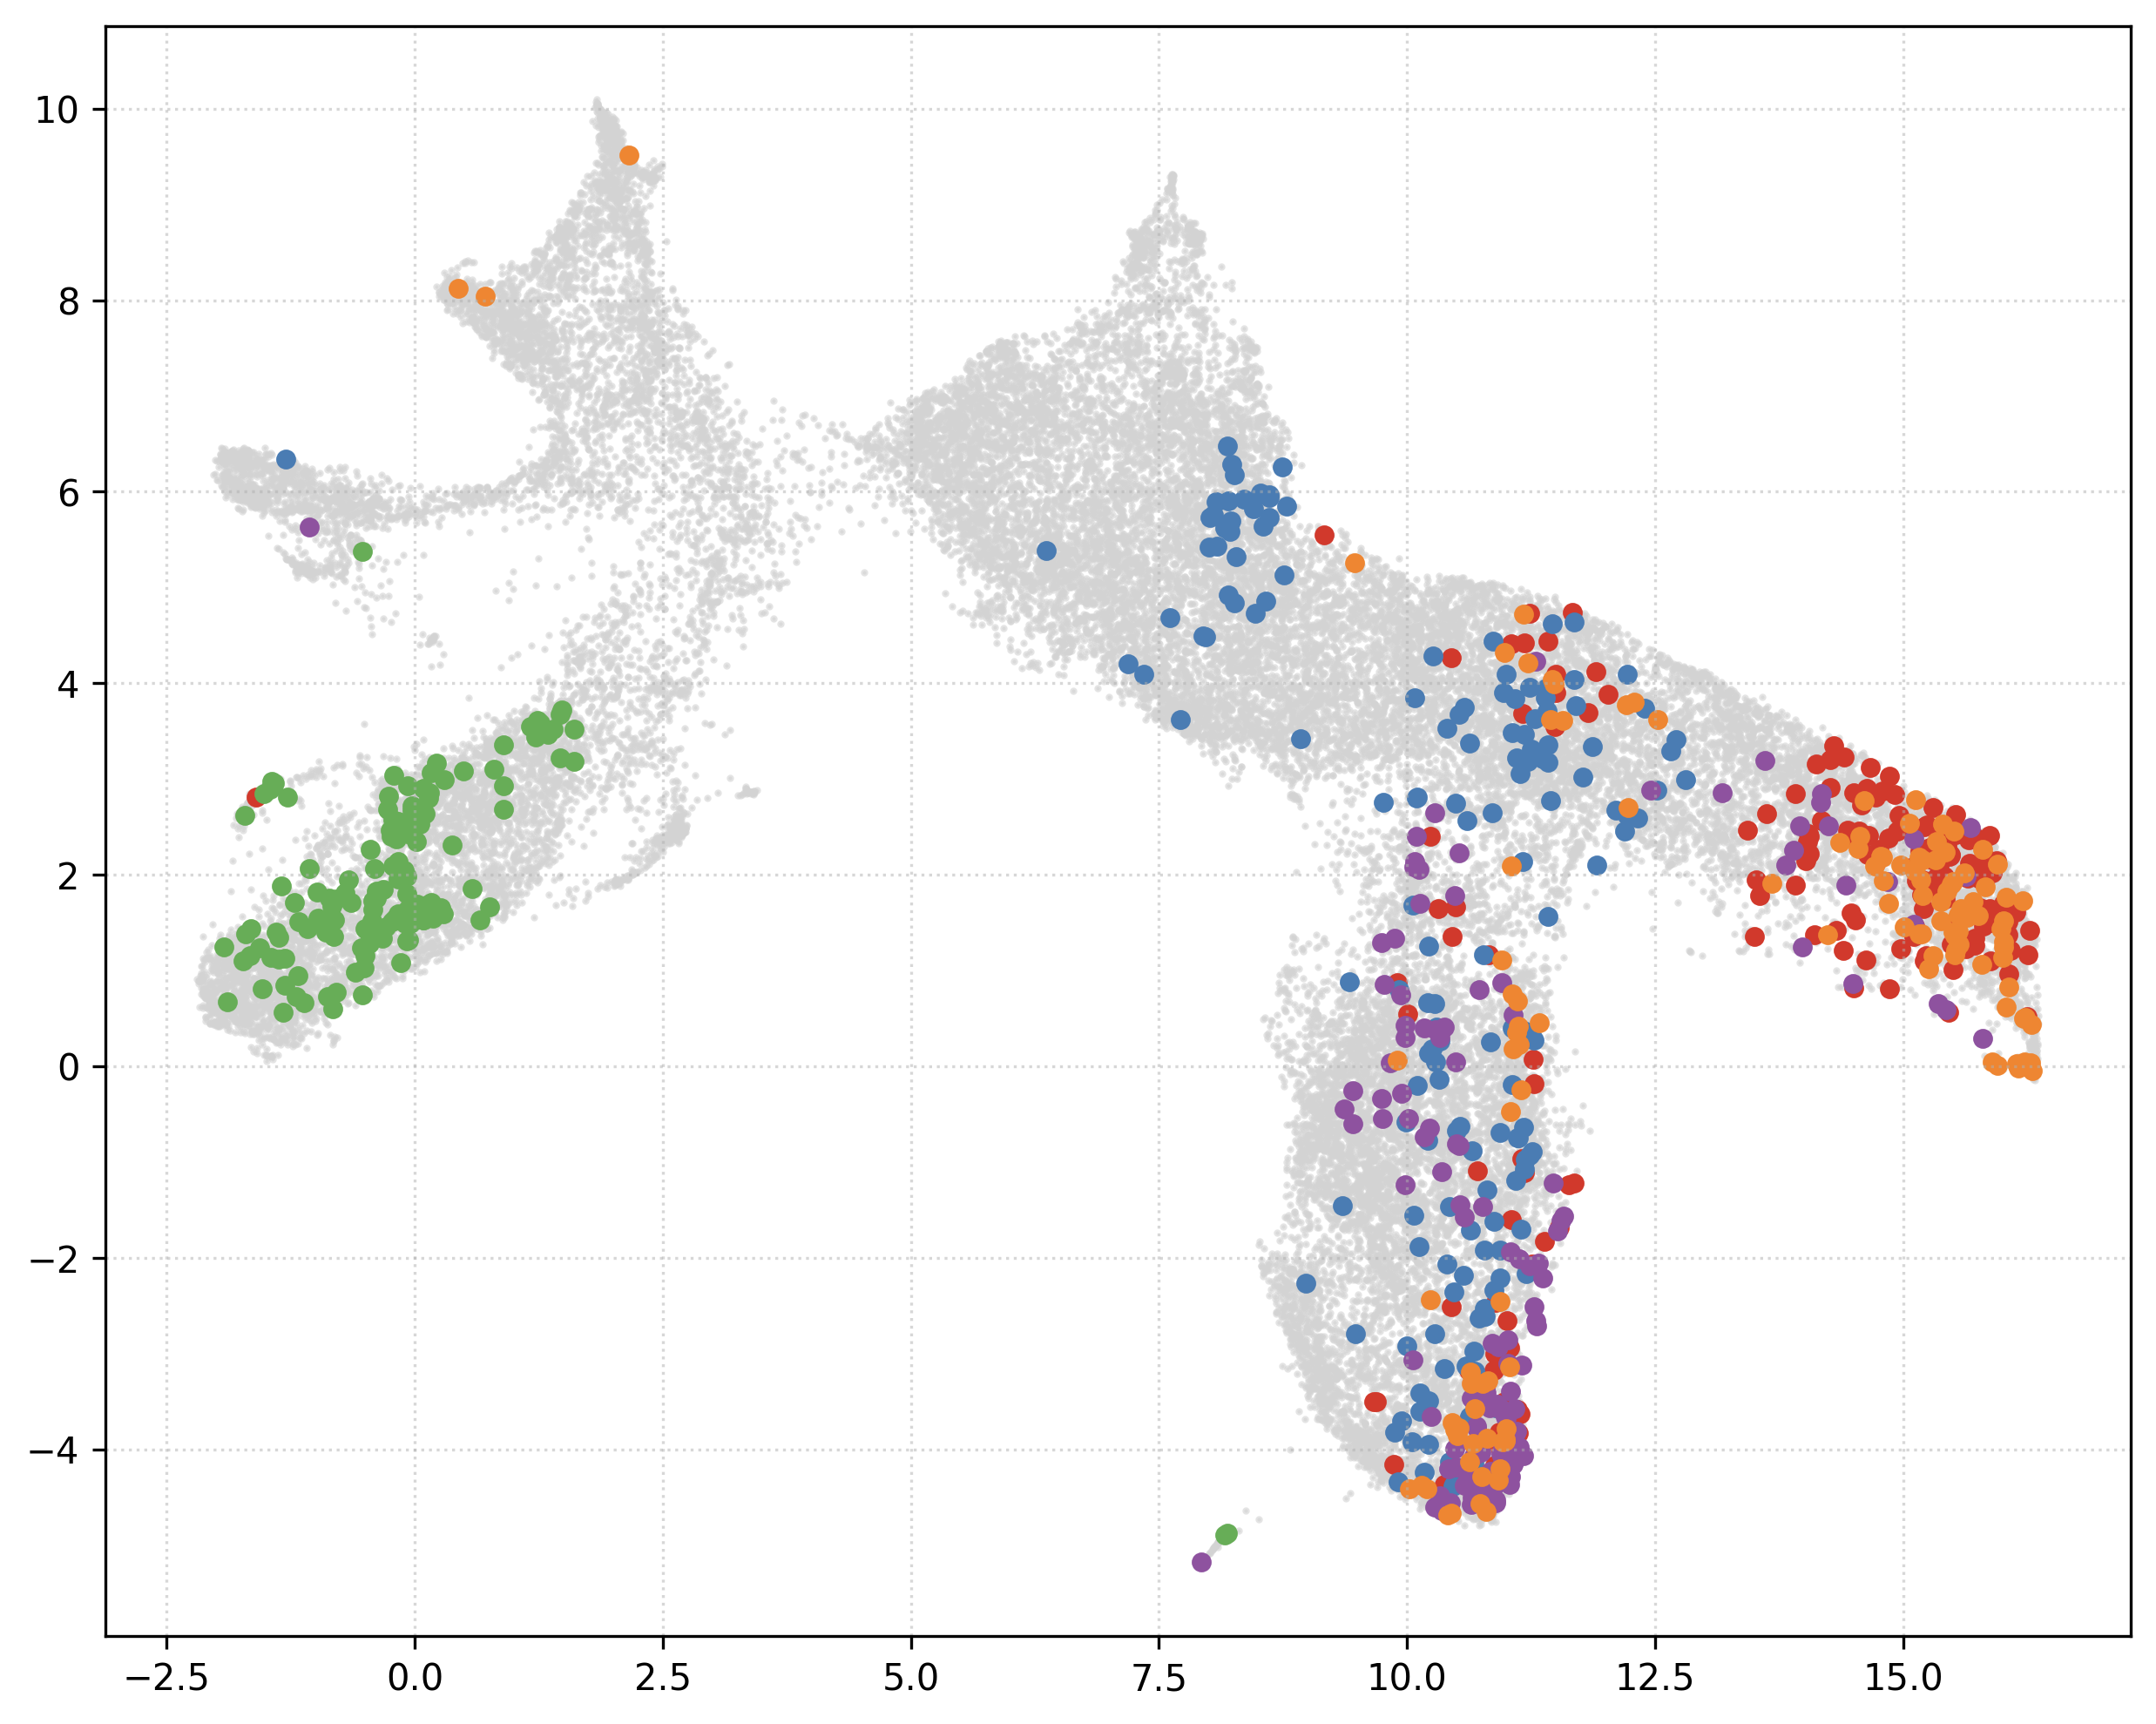

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Convert the given RGB codes into hex format
custom_palette = ['#D1392C', '#4A7CB3', '#67AD57', '#8E529F', '#EE8632']  # Replacing with your provided RGB values

# Assign colors to the top 5 clone_ids using the provided color codes
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = custom_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 8), dpi=300)
# Add grid to the plot
plt.grid(True, alpha=0.5, linestyle=':')

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_', alpha=0.6)

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=20, label=clone_id)



# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
# plt.legend(handles=legend_handles, title="Top 5 Clone IDs")

plt.show()


In [15]:
# Calculate the Calinski-Harabasz score
score = calinski_harabasz_score(embedding, labels)

# Print the score
print("Calinski-Harabasz Score:", score)


NameError: name 'calinski_harabasz_score' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Convert the given RGB codes into hex format
custom_palette = ['#D1392C', '#4A7CB3', '#67AD57', '#8E529F', '#EE8632']  # Replacing with your provided RGB values

# Assign colors to the top 5 clone_ids using the provided color codes
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = custom_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 8), dpi=300)
# Add grid to the plot
plt.grid(True, alpha=0.5, linestyle=':')

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_', alpha=0.6)

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=20, label=clone_id)



# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
# plt.legend(handles=legend_handles, title="Top 5 Clone IDs")

plt.show()
